# Training Coefficients of Polynomial Activation Functions

In this notebook we use polynomial activation functions to train a basic neural network on the MNIST database, with the addition that we also train the coefficients of the activation functions. 

The result is that for low enough degrees, the activation polynomial tends to a polynomial that looks locally like ReLU at the origin.

We start by importing packages.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from tqdm import tqdm

import random

import numpy as np
import matplotlib.pyplot as plt

We now fix the degree of the polynomial activation function.

In [10]:
deg = 5

We define the network.

In [11]:
# Define the custom activation function
class CustomActivation(nn.Module):
    def __init__(self):
        super().__init__()
        # nn.Parameter(torch.randn(deg+1)) 
        self.alpha = self.alpha = nn.Parameter(torch.Tensor(deg+1).fill_(1.0)) #.to(device) # Move alpha to device
        #self.beta = nn.Parameter(torch.Tensor([1.0]))
        
    def forward(self, x):
        dot_products = 0
        for i in range(0,deg+1): dot_products = dot_products + self.alpha[i]*x**i
        return dot_products # + self.beta*x**deg
    
# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.act1 = CustomActivation()  # Use custom activation function
        self.fc2 = nn.Linear(128, 10)
        # self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.act1(x)  # self.relu(x) # self.act1(x)  # Apply custom activation function
       # print(x)
        x = self.fc2(x)
        return x



We load the MNIST dataset.

In [12]:
# Load the MNIST dataset
train_data = MNIST(root='./data', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='./data', train=False, download=True, transform=ToTensor())

# Define the data loaders
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Train the neural network
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-4)

We train for 10 epochs.

In [13]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i, (data, target) in tqdm(enumerate(train_loader), total=len(train_loader)):
        inputs, labels = data.to(device), target.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}: loss={running_loss/len(train_loader):.4f}")

100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:07<00:00, 132.67it/s]


Epoch 1: loss=0.3114


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:10<00:00, 85.79it/s]


Epoch 2: loss=0.1499


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:14<00:00, 63.57it/s]


Epoch 3: loss=0.1149


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:15<00:00, 61.98it/s]


Epoch 4: loss=0.1136


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:14<00:00, 62.57it/s]


Epoch 5: loss=0.0894


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:14<00:00, 64.58it/s]


Epoch 6: loss=0.0826


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:14<00:00, 64.30it/s]


Epoch 7: loss=0.0693


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:15<00:00, 60.07it/s]


Epoch 8: loss=0.0775


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:15<00:00, 59.45it/s]


Epoch 9: loss=0.0602


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:16<00:00, 56.92it/s]

Epoch 10: loss=0.0782


We measure accuracy on test data. 

In [14]:
correct = 0
total = 0
with torch.no_grad():
    for (data, target) in test_loader:
        images, labels = data.to(device), target.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 97.26%


We plot the polynomial activation function.

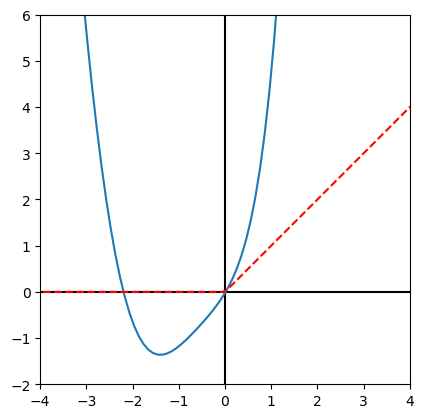

In [15]:

# Define the polynomial function
coeff = list(net.parameters())[2]
# print(list(net.parameters())[2])

def polynomial(x):
    value = 0
    for i in range(0,deg+1): value = value + coeff[i].item()*x**i
    return value # + x**deg

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Create an array of x-values
x = np.linspace(-5, 5, 100)

# Evaluate the polynomial function at each x-value
y = polynomial(x)

plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.plot(x, y)
plt.plot(x, relu(x), color='red', linestyle='--')
#plt.plot(range(5))
plt.xlim(-4, 4)
plt.ylim(-2, 6)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()



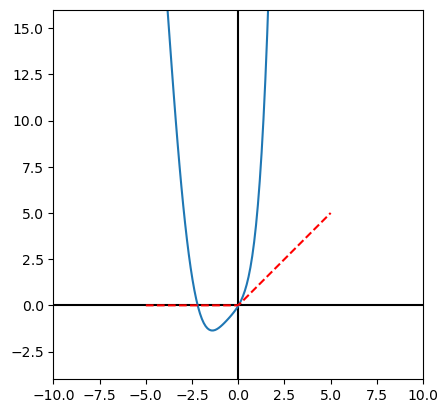

In [16]:
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.plot(x, y)
plt.plot(x, relu(x), color='red', linestyle='--')
#plt.plot(range(5))
plt.xlim(-10, 10)
plt.ylim(-4, 16)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

# Conclusions

With activation function on the form $x^2+bx$, we get $x^2+1.1490*x$ and an accuracy 97.42 % on test set. In the case of degree 1, we get about 92.26 %. With $x^2$ we get 97.42%. Degree 5 and 6 activation polynomials have about 97 % accuracy. With $x^2+x$, we get 92.40 %.

It is not clear that considering training three coefficients $ax^2+bx+c$ improves the performance for the degree 2 activation function. Perhaps $a$ and $c$ can be cancelled out by other coefficients. In any case, we get the polynomial $1.252*x^2+1.1438*x+0.1225$.